In [77]:
import tensorflow as tf
from tensorflow import keras as k
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import datetime as dt
import seaborn as sns
import numpy as np

In [26]:
dataframe = pd.read_csv("./current.csv")
dataframe = dataframe[1:765]
dataframe["sasdate"] = pd.to_datetime(dataframe["sasdate"])

# Custom datetime column
dataframe["datetime"] = dataframe["sasdate"].map(dt.datetime.toordinal)

dataframe.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,datetime
1,1959-01-01,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0151,23.3984,22.2848,31.5847,...,11.326,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN,715145
2,1959-02-01,2451.778,2301.5,17.452,294424.7425,18369.56308,22.4463,23.7142,22.4778,31.8164,...,11.343,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN,715176
3,1959-03-01,2467.594,2318.5,17.617,293418.6704,18523.05762,22.7696,23.8577,22.5882,31.8164,...,11.363,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN,715204
4,1959-04-01,2483.671,2334.9,17.553,299322.8039,18534.46600,23.2547,24.2022,22.9191,32.3184,...,11.403,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN,715235
5,1959-05-01,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6050,24.4032,23.1398,32.4728,...,11.421,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN,715265


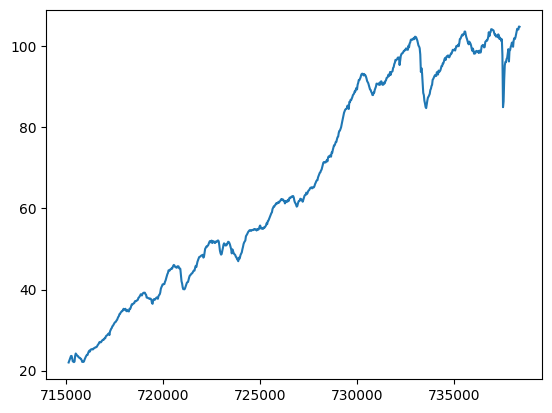

In [27]:
plt.plot(dataframe["sasdate"], dataframe["INDPRO"])
plt.show()

In [28]:
model = sp.stats.linregress(dataframe["datetime"], dataframe["INDPRO"])
print(model)

LinregressResult(slope=0.003863527437655638, intercept=-2741.3281945645904, rvalue=0.9798256116632524, pvalue=0.0, stderr=2.854771714678392e-05, intercept_stderr=20.74811926081771)


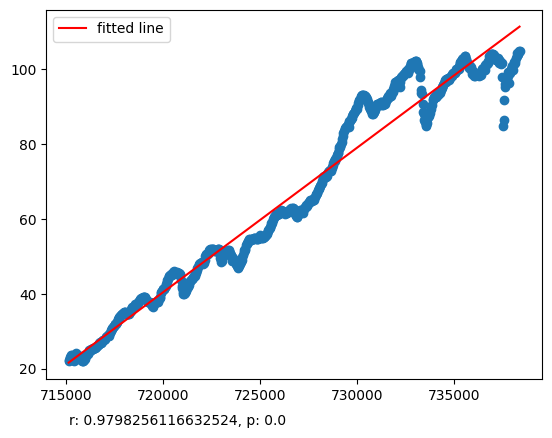

In [44]:
plt.plot(dataframe["datetime"], dataframe["INDPRO"], 'o')
plt.plot(dataframe["datetime"],model.intercept + model.slope*dataframe["datetime"], 'r', label="fitted line")
plt.legend()
plt.text(x=715145, y=5, s=f"r: {model.rvalue}, p: {model.pvalue}")
plt.show()

C:\Users\Bowen\AppData\Local\Temp\ipykernel_10748\3323785543.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe[["sasdate", "INDPRO", "UNRATE", "HOUSTS", "FEDFUNDS", "S&P 500", "CPIAUCSL", "RPI", "CLAIMSx"]].corr()


<AxesSubplot: >

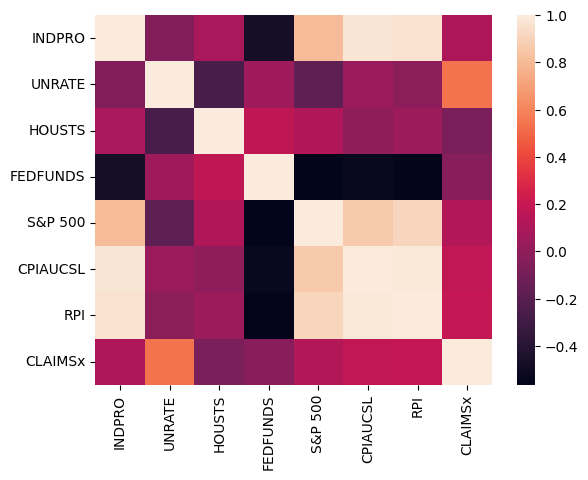

In [37]:
corr = dataframe[["sasdate", "INDPRO", "UNRATE", "HOUSTS", "FEDFUNDS", "S&P 500", "CPIAUCSL", "RPI", "CLAIMSx"]].corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [63]:
dataframe["deltaCPIAUCSL"] = dataframe['CPIAUCSL'].pct_change()
dataframe["deltaCPIAUCSL"]

1           NaN
2     -0.000345
3     -0.001034
4      0.000345
5      0.002070
         ...   
760    0.003319
761    0.009738
762    0.013222
763   -0.000193
764    0.001182
Name: deltaCPIAUCSL, Length: 764, dtype: float64

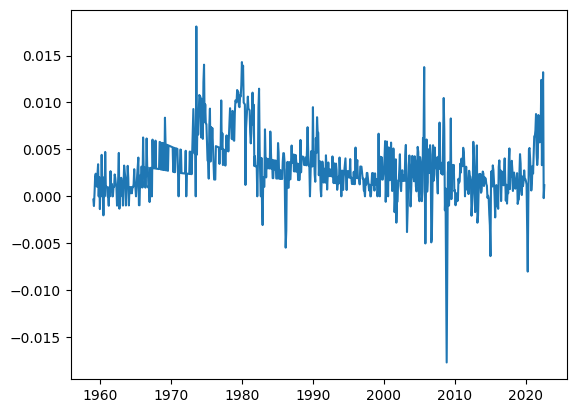

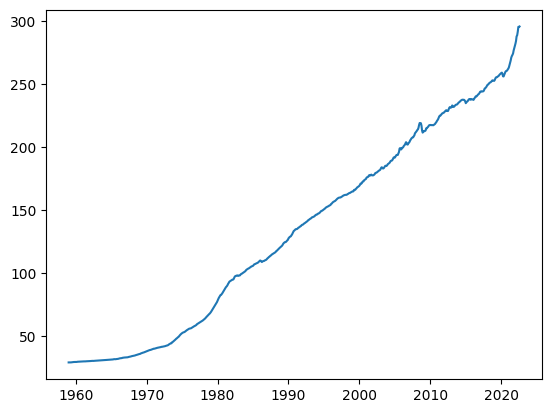

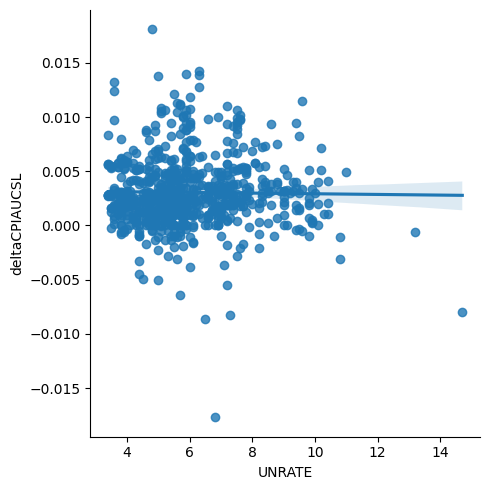

In [79]:
plt.plot(dataframe["sasdate"], dataframe["deltaCPIAUCSL"])
plt.show()

plt.plot(dataframe["sasdate"], dataframe["CPIAUCSL"])
plt.show()

sns.lmplot(data=dataframe, x="UNRATE", y="deltaCPIAUCSL")
plt.show()

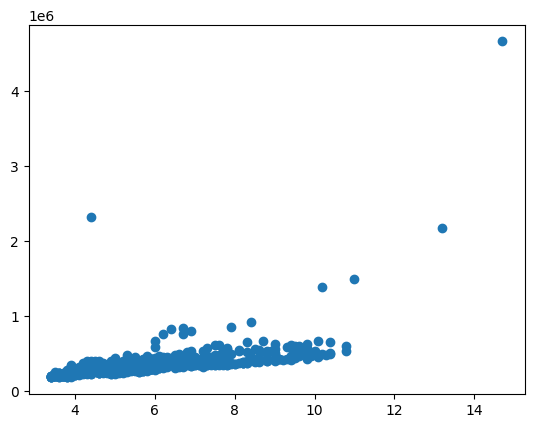

In [81]:
plt.plot(dataframe["UNRATE"], dataframe["CLAIMSx"], "o")
plt.show()

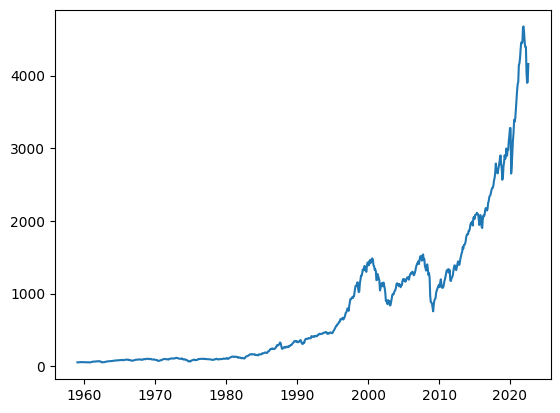

In [85]:
plt.plot(dataframe["sasdate"], dataframe["S&P 500"])
plt.show()

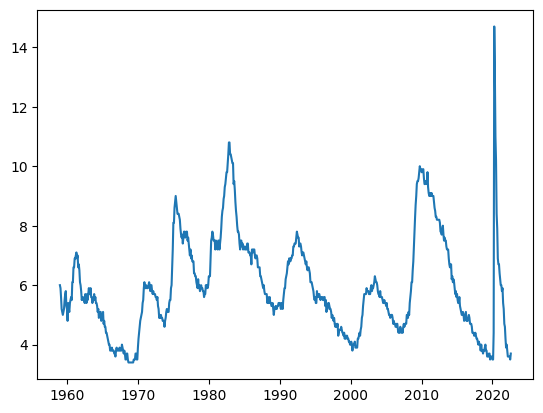

In [86]:
plt.plot(dataframe["sasdate"], dataframe["UNRATE"])
plt.show()

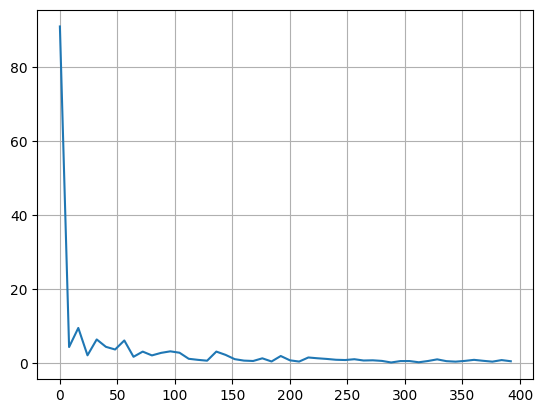

In [90]:
N=100
T=1.0/800.0

yf=sp.fft.fft(np.array(dataframe["UNRATE"]))
xf=sp.fft.fftfreq(N,T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

del N, T, yf, xf